<a href="https://colab.research.google.com/github/fblissjr/streamlit-demos/blob/main/flights_delay_analysis_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis based on the YouTube stream**
by Medallion Data Science, by Rob Mulla https://www.kaggle.com/robikscube

[https://www.youtube.com/watch?v=xs_L6z9QNYY](http://)

https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr

LIVE CODING: Flight Data Exploration with Pandas & Python

This one is very interesting exersize and is related to my line of work.

The datasets are very large in the csv format and RAM intensive. Not sure if can be be handled in parquet format.

![week-3-airline-delays-880-by-440.png](attachment:a31cac82-893f-49ba-86b0-69bb47c8cb54.png)

### 1. Install packages

pip install package Calmap for plotting of calender plot.

In [1]:
!pip install calmap --upgrade --quiet #> /dev/null# if not installed.

In [2]:
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fredbliss","key":"3db2a54e60e4c1ae5f5eaf05d4c86518"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

In [6]:
! kaggle datasets download -d robikscube/flight-delay-dataset-20182022

100% 3.72G/3.73G [00:34<00:00, 137MB/s]
100% 3.73G/3.73G [00:34<00:00, 115MB/s]


In [11]:
! mkdir ../input
! mkdir ../input/flight-delay-dataset-20182022

mkdir: cannot create directory ‘../input’: File exists


In [13]:
! unzip /content/flight-delay-dataset-20182022.zip -d ../input/flight-delay-dataset-20182022

Archive:  /content/flight-delay-dataset-20182022.zip
  inflating: ../input/flight-delay-dataset-20182022/Airlines.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2018.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2018.parquet  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2019.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2019.parquet  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2020.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2020.parquet  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2021.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2021.parquet  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2022.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2022.parquet  
  inflating: ../input/flight-delay-dataset-20182022/raw/Flig

In [3]:
!pip install plotly-calplot --upgrade --quiet #> /dev/null# if not installed.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import calmap
from plotly_calplot import calplot
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-dark-palette')
#%load_ext lab_black

In [ ]:
# plt.style.available # Matplotlib styles

### 2. Loading files

Selected only the 2019 csv file in the begining due to size. glob overloaded the RAM.
parquet files are significantly smaller.

In [7]:
parquet_files = glob.glob('../input/flight-delay-dataset-20182022/Combined_Flights_*.parquet')
#csv_files = glob.glob('../input/flight-delay-dataset-20182022/Combined_Flights_201*.csv') #2018/2019 to save memory
#csv_files = ('../input/flight-delay-dataset-20182022/Combined_Flights_2019.csv') #now 2019 to save memory. 
# The files are RAM intensive and covers the period from 2018 to 2022.

In [8]:
parquet_files

['../input/flight-delay-dataset-20182022/Combined_Flights_2022.parquet',
 '../input/flight-delay-dataset-20182022/Combined_Flights_2021.parquet',
 '../input/flight-delay-dataset-20182022/Combined_Flights_2019.parquet',
 '../input/flight-delay-dataset-20182022/Combined_Flights_2020.parquet',
 '../input/flight-delay-dataset-20182022/Combined_Flights_2018.parquet']

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup',
       'DivAirportLandings'],
      dtype='object')

### 3. Subsetting & choosing specific columns

In [9]:
column_subset = [
    "FlightDate",
    "Airline",
    "Tail_Number",
    "Flight_Number_Marketing_Airline",
    "Origin",
    "Dest",
    "Cancelled",
    "Diverted",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
]


In [58]:
dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=column_subset, filters = [('Flight_Number_Marketing_Airline',  '=' , 561)]))
df = pd.concat(dfs).reset_index(drop=True)

In [59]:
df = pd.concat(dfs).reset_index(drop=True)

In [60]:
cat_col = ['Airline','Origin','Dest','OriginStateName','DestStateName', 'Flight_Number_Marketing_Airline']
for c in cat_col:
    df[c] = df[c].astype("category") 
    
# Converting to type category to reduce the file size.
# Even with subsets the load on the RAM remained high.

### 4. EDA

In [61]:
#df.tail()

Airlines with the most flights:

In [62]:
df['Airline'].value_counts() # highrarcy my most flights

Spirit Air Lines          2084
American Airlines Inc.    2037
Southwest Airlines Co.    1827
United Air Lines Inc.     1471
Delta Air Lines Inc.       575
JetBlue Airways            531
Alaska Airlines Inc.       432
Allegiant Air              290
Hawaiian Airlines Inc.      44
Frontier Airlines Inc.      15
Name: Airline, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9306 entries, 0 to 9305
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   FlightDate                       9306 non-null   datetime64[ns]
 1   Airline                          9306 non-null   category      
 2   Tail_Number                      9237 non-null   object        
 3   Flight_Number_Marketing_Airline  9306 non-null   category      
 4   Origin                           9306 non-null   category      
 5   Dest                             9306 non-null   category      
 6   Cancelled                        9306 non-null   bool          
 7   Diverted                         9306 non-null   bool          
 8   CRSDepTime                       9306 non-null   int64         
 9   DepTime                          9094 non-null   float64       
 10  DepDelayMinutes                  9094 non-null   float64    

Ploting the delays distribution:

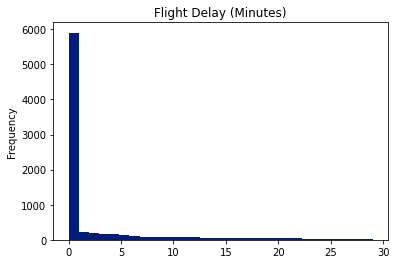

In [64]:
df.query('DepDelayMinutes < 30')['DepDelayMinutes'].plot(kind='hist', bins=30,
                                                        title='Flight Delay (Minutes)')

# As most of the flights are with no delay (0 min), It is seen that the '0' is the highest accumulation, which overshadows the real delays.

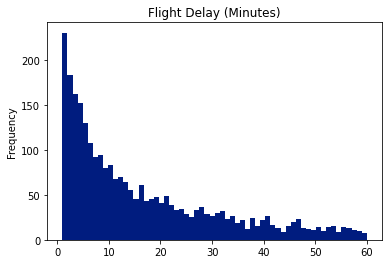

In [65]:
df.query('(DepDelayMinutes > 0) and (DepDelayMinutes < 61)')['DepDelayMinutes'].plot(kind='hist', bins=60,
                                                                                     title='Flight Delay (Minutes)')
# Zero '0' minute delays are excluded.

### 5. Delays Categories

According to Wikipedia: https://en.wikipedia.org/wiki/Flight_cancellation_and_delay
Delays are divided into three categories, namely;
- "on time or small delay" (up to 15 minutes delay), 
- "Medium delay" (15 – 45 minutes delay) and,
- "Large delay" ( 45 minutes delay). 
The naming can vary among Airlines.


In [ ]:
# df[df['DepDelayMinutes'].isna()] -- Cancelled flights

In [66]:
df['DelayGroup'] = None
df.loc[df['DepDelayMinutes'] == 0, 'DelayGroup'] = 'OnTime_Early'
df.loc[(df['DepDelayMinutes'] > 0) & (df['DepDelayMinutes'] <= 15), 'DelayGroup'] = 'Small_Delay'
df.loc[(df['DepDelayMinutes'] > 15) & (df['DepDelayMinutes'] <= 45), 'DelayGroup'] = 'Medium_Delay'
df.loc[df['DepDelayMinutes'] > 45, 'DelayGroup'] = 'Large_Delay'
df.loc[df['Cancelled'], 'DelayGroup'] = 'Cancelled'

# Generally 0-15 min delays are considered not significant. 
# Usually it can be made up for with an earlier arrival,

In [67]:
df.head()

,FlightDate,Airline,Tail_Number,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup
0,2022-04-01,Southwest Airlines Co.,N8697C,561,DEN,MDW,False,False,1150,1157.0,7.0,11292,"Denver, CO",Colorado,13232,"Chicago, IL",Illinois,10.0,5.0,1510,1503.0,0.0,Small_Delay
1,2022-04-01,Southwest Airlines Co.,N8697C,561,FLL,ISP,True,False,2030,NaN,NaN,11697,"Fort Lauderdale, FL",Florida,12391,"Islip, NY",New York,NaN,NaN,2315,NaN,NaN,Cancelled
2,2022-04-01,Southwest Airlines Co.,N8697C,561,HOU,DEN,False,False,925,921.0,0.0,12191,"Houston, TX",Texas,11292,"Denver, CO",Colorado,11.0,6.0,1100,1040.0,0.0,OnTime_Early
3,2022-04-01,Southwest Airlines Co.,N8697C,561,MDW,FLL,True,False,1555,NaN,NaN,13232,"Chicago, IL",Illinois,11697,"Fort Lauderdale, FL",Florida,NaN,NaN,1945,NaN,NaN,Cancelled
4,2022-04-03,Southwest Airlines Co.,N8654B,561,CMH,LAS,False,False,525,525.0,0.0,11066,"Columbus, OH",Ohio,12889,"Las Vegas, NV",Nevada,8.0,6.0,650,650.0,0.0,OnTime_Early


### 6. Cancellations and Diversions:
- Cancelled flights

In [68]:
print(df['Cancelled'].value_counts())
print('Percent Cancelled :', round(sum(df['Cancelled'] == True) / len(df['Cancelled']) * 100, 2), '% of all flights')

False    9091
True      215
Name: Cancelled, dtype: int64
Percent Cancelled : 2.31 % of all flights


- Diverted flights

In [69]:
print(df['Diverted'].value_counts())
print('Percent Diverted :', round(sum(df['Diverted'] == True) / len(df['Diverted']) * 100, 2), '% of all flights') 

False    9293
True       13
Name: Diverted, dtype: int64
Percent Diverted : 0.14 % of all flights


In [ ]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(data=df[df['DelayGroup'] == 'Large_Delay'], x='DepDelayMinutes', y='ArrDelayMinutes')

In [ ]:
#Diverted = df[df['Diverted'] == True]

In [70]:
df['DelayGroup'].value_counts()

OnTime_Early    5901
Small_Delay     1616
Medium_Delay     874
Large_Delay      700
Cancelled        215
Name: DelayGroup, dtype: int64

In [ ]:
#Diverted['DelayGroup'].value_counts()

In [71]:
pal = sns.color_palette()

### 7. Plotting the delay groups

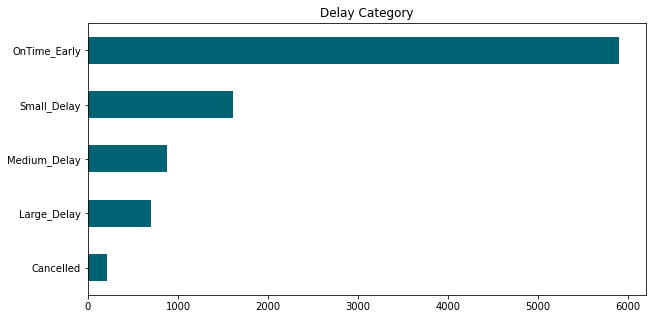

In [72]:
df['DelayGroup'].value_counts(ascending=True).plot(kind='barh', color=pal[5], title='Delay Category', figsize=(10,5))

In [73]:
df['DelayGroup'].isna().sum()

0

In [74]:
#Diverted['DelayGroup'].value_counts(ascending=True).plot(kind='barh', color=pal[4], title='Delay Category - Diverted -', figsize=(10,5))

Diversion implies that the aircraft is diverted to a different destination field. This has no impact in depature delay calculations.

In [75]:
print((df['DelayGroup'].value_counts() / df.shape[0] * 100).round(2))
print(sum(df['DelayGroup'].value_counts() / df.shape[0] * 100))

OnTime_Early    63.41
Small_Delay     17.37
Medium_Delay     9.39
Large_Delay      7.52
Cancelled        2.31
Name: DelayGroup, dtype: float64
100.00000000000001


In [28]:
#df[df['DelayGroup'].isna()]

In [76]:
df['DelayGroup'].value_counts(normalize=True) * 100 # normalize to return proportions rather than frequencies.

OnTime_Early    63.410703
Small_Delay     17.365141
Medium_Delay     9.391790
Large_Delay      7.522029
Cancelled        2.310337
Name: DelayGroup, dtype: float64

Text(0.5, 0.98, 'Delay Groups')

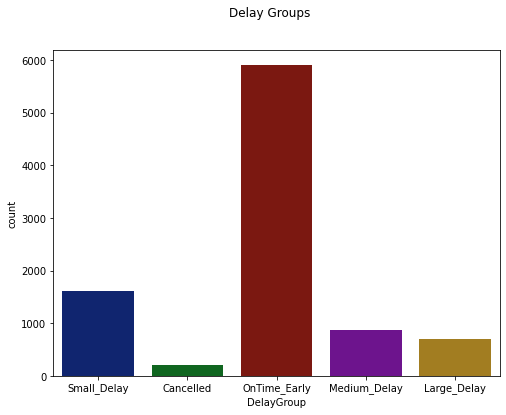

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='DelayGroup')
plt.suptitle('Delay Groups')

In [78]:
df['FlightDate'] = pd.to_datetime(df['FlightDate']) # Original as object.

In [79]:
df['FlightDate'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    9306
unique                   1654
top       2019-10-04 00:00:00
freq                       12
first     2018-01-01 00:00:00
last      2022-07-31 00:00:00
Name: FlightDate, dtype: object

In [80]:
df['Month'] = df['FlightDate'].dt.month  # Extract the months.

In [81]:
df_agg = df.groupby('Month')['DelayGroup'].value_counts(normalize=True).unstack() * 100 # Grouping by month and unstacking the delay group
col_order = ['OnTime_Early','Small_Delay','Medium_Delay','Large_Delay','Cancelled'] # resorting the columns.
df_agg[col_order].style.background_gradient(cmap='Blues')

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,70.431894,16.832780,6.201550,5.094131,1.439646
2,60.170524,20.341048,10.840438,6.699147,1.948843
3,63.453815,15.562249,8.835341,6.626506,5.522088
4,60.869565,16.469038,8.036891,8.036891,6.587615
5,65.126050,18.627451,7.703081,7.282913,1.260504
6,55.269923,20.951157,11.953728,10.796915,1.028278
7,58.169935,16.557734,13.071895,10.675381,1.525054
8,58.410596,16.291391,11.125828,10.860927,3.311258
9,74.956217,14.711033,4.728546,3.852890,1.751313


### 8. Calender delay map

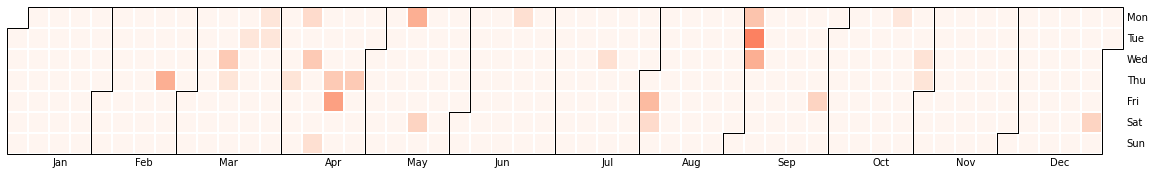

In [82]:
events = df.groupby('FlightDate')['Cancelled'].mean()
fig, ax = plt.subplots(figsize=(20,10))
calmap.yearplot(events, year=2019, monthly_border=True)

In [83]:
'''
events = df.groupby('FlightDate')['Cancelled'].mean()
fig, ax = plt.subplots(figsize=(20,10))
calmap.yearplot(events, year=2019, monthly_border=True)
calmap.yearplot(events.apply(np.log), year=2019, monthly_border=True)
# Applying log scaling.
'''

"\nevents = df.groupby('FlightDate')['Cancelled'].mean()\nfig, ax = plt.subplots(figsize=(20,10))\ncalmap.yearplot(events, year=2019, monthly_border=True)\ncalmap.yearplot(events.apply(np.log), year=2019, monthly_border=True)\n# Applying log scaling.\n"

Text(0.4, 0.9, 'US Flight Cancellations')

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning:

invalid value encountered in true_divide



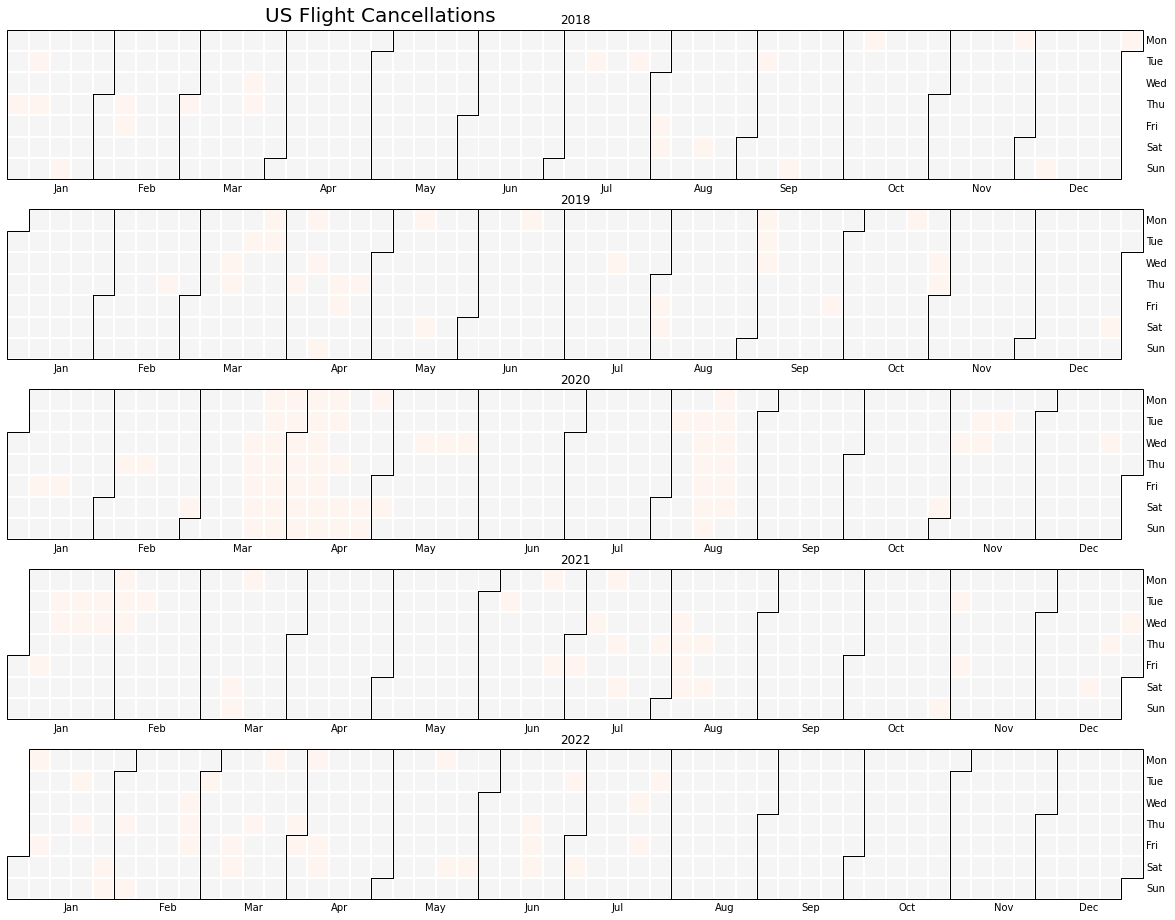

In [84]:
fig, axs = plt.subplots(5, 1, figsize=(24,16))  # 5 rowa 1 column
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]): # -- for the full set  in case loaded. 
    calmap.yearplot(events.apply(np.log), year=year, monthly_border=True, ax=axs[i])
    axs[i].set_title(year)
fig.suptitle('US Flight Cancellations', x= 0.4, y=0.9, fontsize=20)

In [85]:
# Plotly style plot
fig = calplot(events.reset_index(), x='FlightDate', dark_theme=True, y='Cancelled', filtwidth=1000, title='US Flight Cancellations')
fig.show()

TypeError: ignored

### 9. Delay group per Airline

In [53]:
testdf = df[(df['Flight_Number_Marketing_Airline'] == 561')]

SyntaxError: ignored

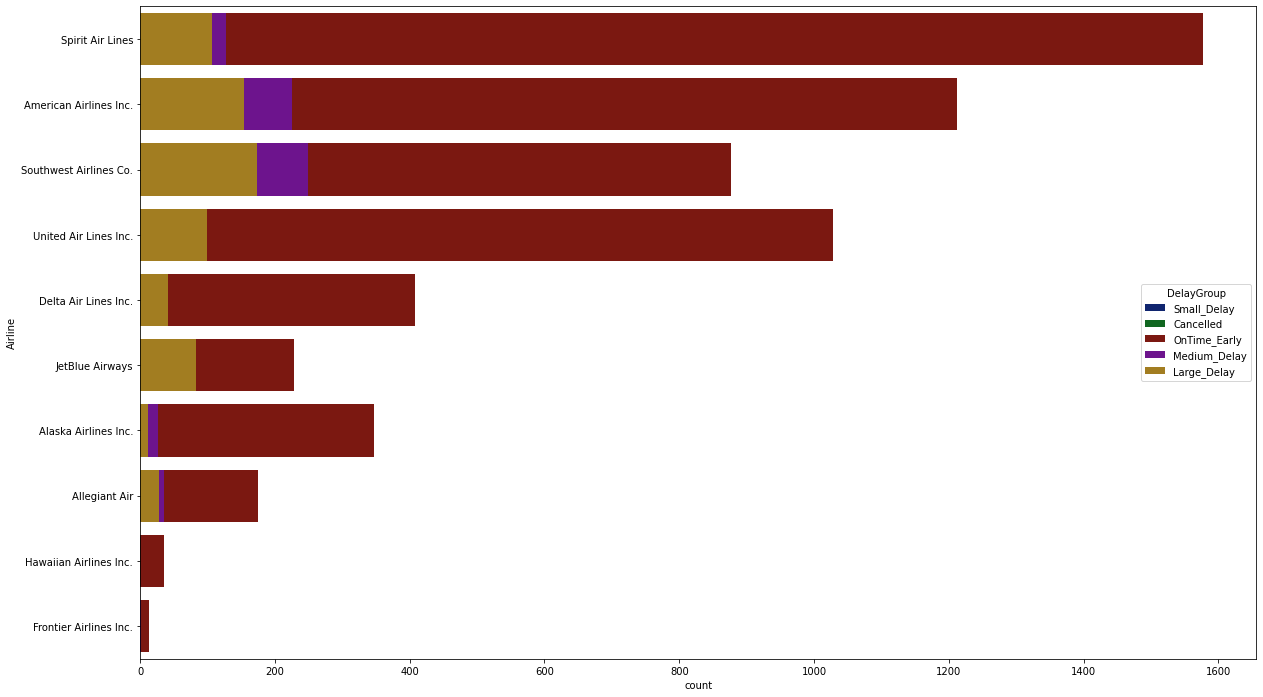

In [86]:
# Delay categories per Airline.
plt.figure(figsize=(20,12))
airline_order = df['Airline'].value_counts().index.tolist()
sns.countplot(data=df, y='Airline', order=airline_order, hue='DelayGroup', dodge=False)
plt.show()

### 10. Top 10 worst performers (Lemons) 🍋

In [87]:
df['Tail_Number'].nunique()

2029

In [88]:
df[df['Flight_Number_Marketing_Airline'] == '561']['Flight_Number_Marketing_Airline'].value_counts().head(100)

561    0
Name: Flight_Number_Marketing_Airline, dtype: int64

## Next is to map the Tail_Number/Registration to Aircraft type & 
check for performnace per number of flights/ratio.

Thanks to Rob Mulla and his great videos.